In [18]:
from OptModels import DrudeModel as dm
from OptModels import LorentzDrudeModel as ldm
from MaterialModels import LorentzDrudeModel as ldm_new
from materials import Titanium_prop, Chromium_prop
from ThinFilmModel import ThinFilmModel as tfm

import numpy as np
from scipy.interpolate import interp1d
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
%matplotlib notebook

# Titanium

In [3]:
ti_blk = dm(wl=np.arange(2e-6, 31e-6, 1e-6),
            T=np.arange(300, 1100, 100),
            metal_props=Titanium_prop,
               )
ti_blk_P = dm(wl=np.arange(2e-6, 31e-6, 1e-6),
                  T=np.array([300]),
                  metal_props=Titanium_prop,
                  from_data='Data/Ti_Palik.csv'
                 )

ti_blk_LD = dm(wl=np.arange(2e-6, 31e-6, 1e-6),
                  T=np.array([300]),
                  metal_props=Titanium_prop,
                  from_data='Data/Ti_Rakic_LD.csv'
                 )
ti_blk_O = dm(wl=np.arange(2e-6, 31e-6, 1e-6),
                  T=np.array([300]),
                  metal_props=Titanium_prop,
                  from_data='Data/Ti_Ordal.csv'
                 )
ti_blk_MyLD = ldm(wl=np.arange(2e-6, 31e-6, 1e-6),
                              T=np.arange(300, 1100, 100),
                              omega_0=2 * np.pi * 1.878778621627e14,
                              metal_props=Titanium_prop,)

ti_blk_LDNew = ldm_new(wl=np.arange(2e-6, 31e-6, 1e-6),
                       T=np.array([300]),
                       metal_props=Titanium_prop,)

In [28]:
ti_thin = tfm(wl=np.arange(2e-6, 31e-6, 1e-6),
        T=np.arange(300, 1100, 100),
        n_1=ti_blk.n_1,
        k_1=ti_blk.k_1,
        pathsubstrate='Data/SiO2.csv',)
ti_thin_P = tfm(wl=np.arange(2e-6, 31e-6, 1e-6),
        T=np.array([300]),
        n_1=ti_blk_P.n_1,
        k_1=ti_blk_P.k_1,
        pathsubstrate='Data/SiO2.csv',)
ti_thin_LD = tfm(wl=np.arange(2e-6, 31e-6, 1e-6),
        T=np.array([300]),
        n_1=ti_blk_LD.n_1,
        k_1=ti_blk_LD.k_1,
        pathsubstrate='Data/SiO2.csv',)
ti_thin_O = tfm(wl=np.arange(2e-6, 31e-6, 1e-6),
        T=np.array([300]),
        n_1=ti_blk_O.n_1,
        k_1=ti_blk_O.k_1,
        pathsubstrate='Data/SiO2.csv',)

ti_thin_MyLD = tfm(wl=np.arange(2e-6, 31e-6, 1e-6),
        T=np.arange(300, 1100, 100),
        n_1=ti_blk_MyLD.n_1,
        k_1=ti_blk_MyLD.k_1,
        pathsubstrate='Data/SiO2.csv',)

ti_thin_LDNew = tfm(wl=np.arange(2e-6, 31e-6, 1e-6),
        T=np.array([300]),
        n_1=ti_blk_LDNew.n_1,
        k_1=ti_blk_LDNew.k_1,
        pathsubstrate='Data/SiO2.csv',)

In [4]:
λnew = np.linspace(ti_blk.wl[0], ti_blk.wl[-1], num=500, endpoint=True)

<IPython.core.display.Javascript object>


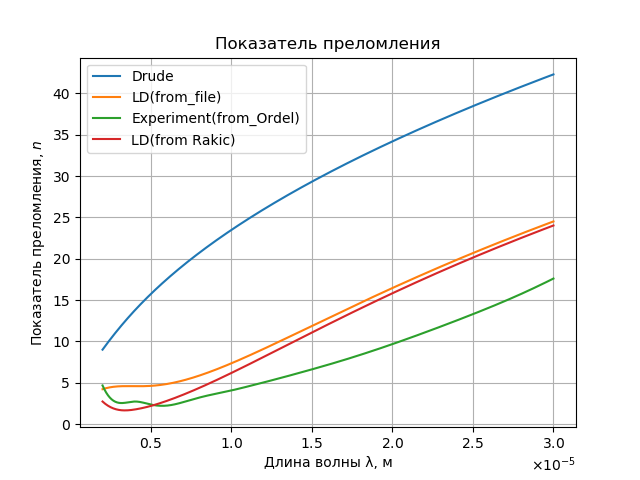

In [5]:
fig, ax = plt.subplots()

f1 = interp1d(ti_blk.wl, ti_blk.n_1[:,0], kind='cubic')
ax.plot(λnew, f1(λnew), label='Drude')

f2 = interp1d(ti_blk_LD.wl, ti_blk_LD.n_1[:,0], kind='cubic')
ax.plot(λnew, f2(λnew), label='LD(from_file)')

f3 = interp1d(ti_blk_O.wl, ti_blk_O.n_1[:,0], kind='cubic')
ax.plot(λnew, f3(λnew), label='Experiment(from_Ordel)')

f4 = interp1d(ti_blk_LDNew.wl, ti_blk_LDNew.n_1[:,0], kind='cubic')
ax.plot(λnew, f4(λnew), label='LD(from Rakic)')

ax.set_xlabel('Длина волны λ, м')
ax.set_ylabel('Показатель преломления, $n$')
ax.set_title('Показатель преломления')
ax.legend()
ax.grid()
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)


<IPython.core.display.Javascript object>


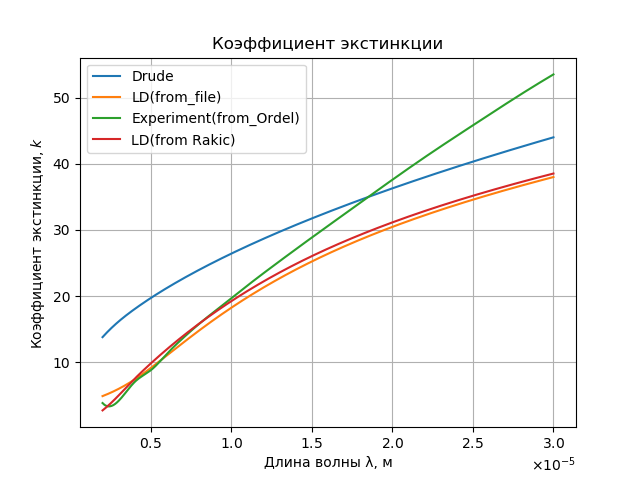

In [6]:
fig, ax = plt.subplots()

f1 = interp1d(ti_blk.wl, ti_blk.k_1[:,0], kind='cubic')
ax.plot(λnew, f1(λnew), label='Drude')

f2 = interp1d(ti_blk_LD.wl, ti_blk_LD.k_1[:,0], kind='cubic')
ax.plot(λnew, f2(λnew), label='LD(from_file)')

f3 = interp1d(ti_blk_O.wl, ti_blk_O.k_1[:,0], kind='cubic')
ax.plot(λnew, f3(λnew), label='Experiment(from_Ordel)')

f4 = interp1d(ti_blk_LDNew.wl, ti_blk_LDNew.k_1[:,0], kind='cubic')
ax.plot(λnew, f4(λnew), label='LD(from Rakic)')

ax.set_xlabel('Длина волны λ, м')
ax.set_ylabel('Коэффициент экстинкции, $k$')
ax.set_title('Коэффициент экстинкции')
ax.legend()
ax.grid()
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)


<IPython.core.display.Javascript object>


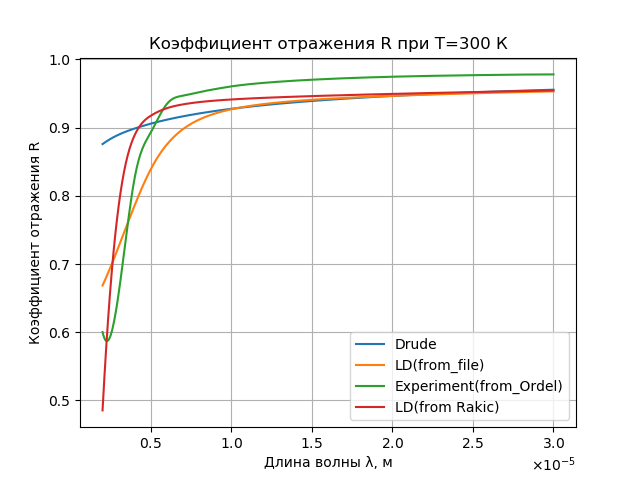

In [7]:
fig, ax = plt.subplots()

f1 = interp1d(ti_blk.wl, ti_blk.R[:,0], kind='cubic')
ax.plot(λnew, f1(λnew), label='Drude')

f2 = interp1d(ti_blk_LD.wl, ti_blk_LD.R[:,0], kind='cubic')
ax.plot(λnew, f2(λnew), label='LD(from_file)')

f3 = interp1d(ti_blk_O.wl, ti_blk_O.R[:,0], kind='cubic')
ax.plot(λnew, f3(λnew), label='Experiment(from_Ordel)')

f4 = interp1d(ti_blk_LDNew.wl, ti_blk_LDNew.R[:,0], kind='cubic')
ax.plot(λnew, f4(λnew), label='LD(from Rakic)')

ax.set_xlabel('Длина волны λ, м')
ax.set_ylabel('Коэффициент отражения R')
ax.set_title('Коэффициент отражения R при T=300 К')
ax.legend()
ax.grid()
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)


<IPython.core.display.Javascript object>


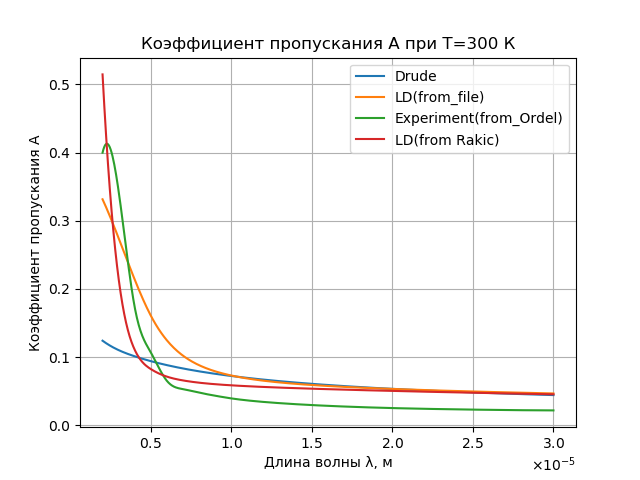

In [8]:
fig, ax = plt.subplots()

f1 = interp1d(ti_blk.wl, ti_blk.A[:,0], kind='cubic')
ax.plot(λnew, f1(λnew), label='Drude')

f2 = interp1d(ti_blk_LD.wl, ti_blk_LD.A[:,0], kind='cubic')
ax.plot(λnew, f2(λnew), label='LD(from_file)')

f3 = interp1d(ti_blk_O.wl, ti_blk_O.A[:,0], kind='cubic')
ax.plot(λnew, f3(λnew), label='Experiment(from_Ordel)')

f4 = interp1d(ti_blk_LDNew.wl, ti_blk_LDNew.A[:,0], kind='cubic')
ax.plot(λnew, f4(λnew), label='LD(from Rakic)')

ax.set_xlabel('Длина волны λ, м')
ax.set_ylabel('Коэффициент пропускания A')
ax.set_title('Коэффициент пропускания A при T=300 К')
ax.legend()
ax.grid()
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)

## ThinFilms

<IPython.core.display.Javascript object>


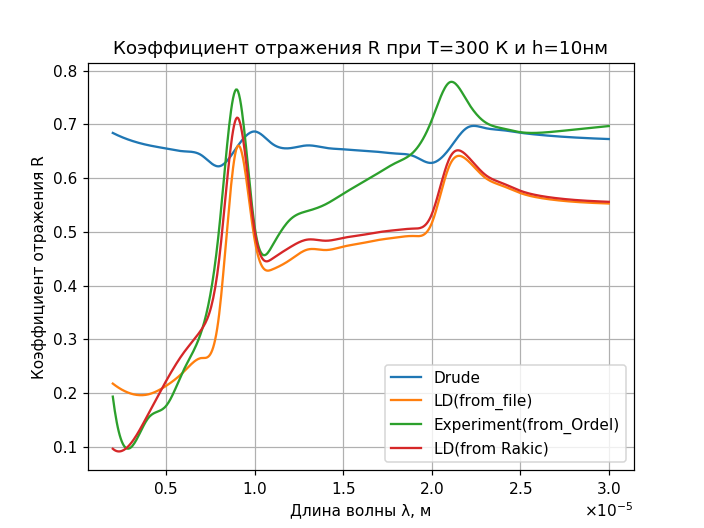

In [39]:
fig, ax = plt.subplots()

f1 = interp1d(ti_thin.wl, ti_thin.R[:,0,0], kind='cubic')
ax.plot(λnew, f1(λnew), label='Drude')

f2 = interp1d(ti_thin_LD.wl, ti_thin_LD.R[:,0,0], kind='cubic')
ax.plot(λnew, f2(λnew), label='LD(from_file)')

f3 = interp1d(ti_thin_O.wl, ti_thin_O.R[:,0,0], kind='cubic')
ax.plot(λnew, f3(λnew), label='Experiment(from_Ordel)')

f4 = interp1d(ti_thin_LDNew.wl, ti_thin_LDNew.R[:,0,0], kind='cubic')
ax.plot(λnew, f4(λnew), label='LD(from Rakic)')

ax.set_xlabel('Длина волны λ, м')
ax.set_ylabel('Коэффициент отражения R')
ax.set_title('Коэффициент отражения R при T=300 К и h=10нм')
ax.legend()
ax.grid()
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)

<IPython.core.display.Javascript object>


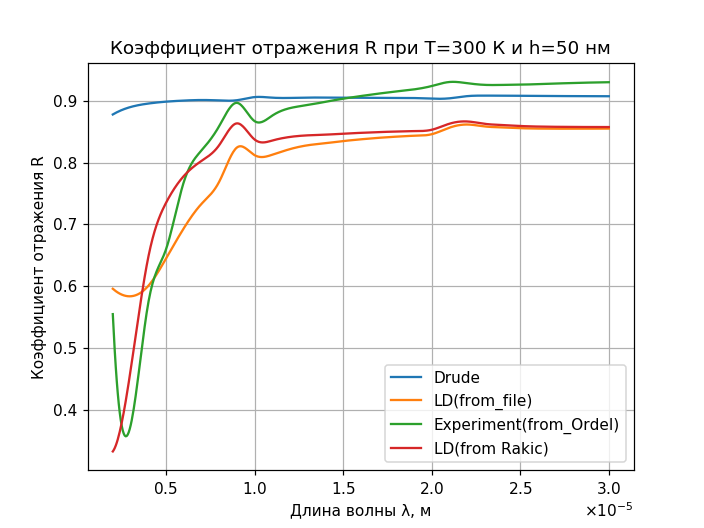

In [30]:
fig, ax = plt.subplots()

f1 = interp1d(ti_thin.wl, ti_thin.R[:,0,1], kind='cubic')
ax.plot(λnew, f1(λnew), label='Drude')

f2 = interp1d(ti_thin_LD.wl, ti_thin_LD.R[:,0,1], kind='cubic')
ax.plot(λnew, f2(λnew), label='LD(from_file)')

f3 = interp1d(ti_thin_O.wl, ti_thin_O.R[:,0,1], kind='cubic')
ax.plot(λnew, f3(λnew), label='Experiment(from_Ordel)')

f4 = interp1d(ti_thin_LDNew.wl, ti_thin_LDNew.R[:,0,1], kind='cubic')
ax.plot(λnew, f4(λnew), label='LD(from Rakic)')

ax.set_xlabel('Длина волны λ, м')
ax.set_ylabel('Коэффициент отражения R')
ax.set_title('Коэффициент отражения R при T=300 К и h=50 нм')
ax.legend()
ax.grid()
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)

<IPython.core.display.Javascript object>


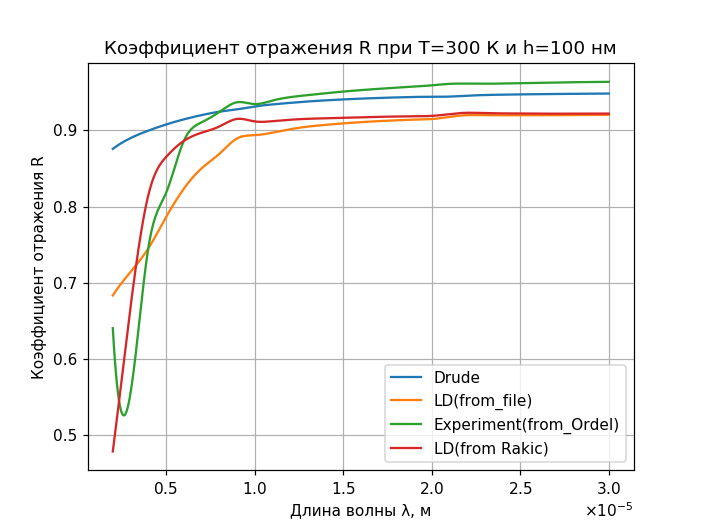

In [31]:
fig, ax = plt.subplots()

f1 = interp1d(ti_thin.wl, ti_thin.R[:,0,2], kind='cubic')
ax.plot(λnew, f1(λnew), label='Drude')

f2 = interp1d(ti_thin_LD.wl, ti_thin_LD.R[:,0,2], kind='cubic')
ax.plot(λnew, f2(λnew), label='LD(from_file)')

f3 = interp1d(ti_thin_O.wl, ti_thin_O.R[:,0,2], kind='cubic')
ax.plot(λnew, f3(λnew), label='Experiment(from_Ordel)')

f4 = interp1d(ti_thin_LDNew.wl, ti_thin_LDNew.R[:,0,2], kind='cubic')
ax.plot(λnew, f4(λnew), label='LD(from Rakic)')

ax.set_xlabel('Длина волны λ, м')
ax.set_ylabel('Коэффициент отражения R')
ax.set_title('Коэффициент отражения R при T=300 К и h=100 нм')
ax.legend()
ax.grid()
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)

<IPython.core.display.Javascript object>


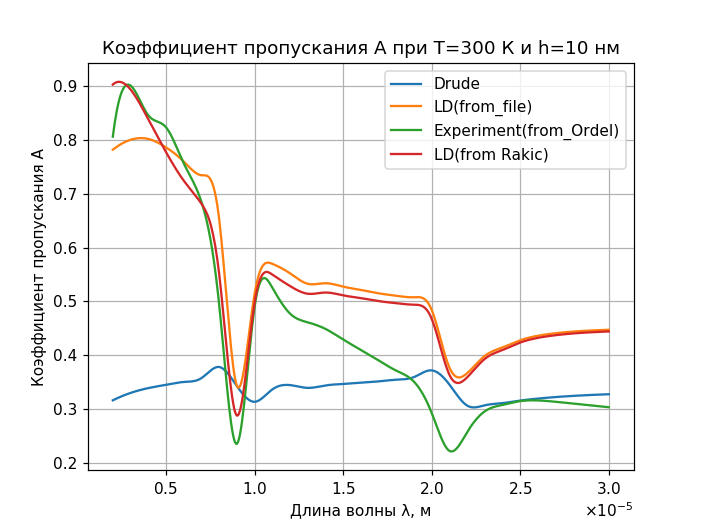

In [40]:
fig, ax = plt.subplots()

f1 = interp1d(ti_thin.wl, ti_thin.A[:,0,0], kind='cubic')
ax.plot(λnew, f1(λnew), label='Drude')

f2 = interp1d(ti_thin_LD.wl, ti_thin_LD.A[:,0,0], kind='cubic')
ax.plot(λnew, f2(λnew), label='LD(from_file)')

f3 = interp1d(ti_thin_O.wl, ti_thin_O.A[:,0,0], kind='cubic')
ax.plot(λnew, f3(λnew), label='Experiment(from_Ordel)')

f4 = interp1d(ti_thin_LDNew.wl, ti_thin_LDNew.A[:,0,0], kind='cubic')
ax.plot(λnew, f4(λnew), label='LD(from Rakic)')

ax.set_xlabel('Длина волны λ, м')
ax.set_ylabel('Коэффициент пропускания A')
ax.set_title('Коэффициент пропускания A при T=300 К и h=10 нм')
ax.legend()
ax.grid()
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)

<IPython.core.display.Javascript object>


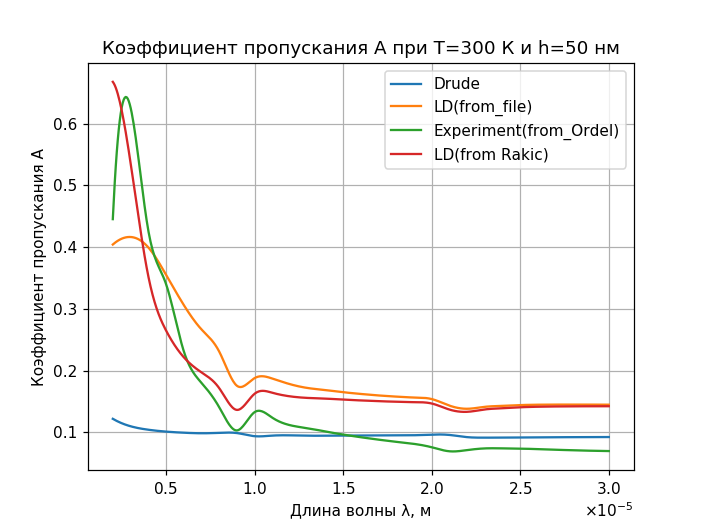

In [41]:
fig, ax = plt.subplots()

f1 = interp1d(ti_thin.wl, ti_thin.A[:,0,1], kind='cubic')
ax.plot(λnew, f1(λnew), label='Drude')

f2 = interp1d(ti_thin_LD.wl, ti_thin_LD.A[:,0,1], kind='cubic')
ax.plot(λnew, f2(λnew), label='LD(from_file)')

f3 = interp1d(ti_thin_O.wl, ti_thin_O.A[:,0,1], kind='cubic')
ax.plot(λnew, f3(λnew), label='Experiment(from_Ordel)')

f4 = interp1d(ti_thin_LDNew.wl, ti_thin_LDNew.A[:,0,1], kind='cubic')
ax.plot(λnew, f4(λnew), label='LD(from Rakic)')

ax.set_xlabel('Длина волны λ, м')
ax.set_ylabel('Коэффициент пропускания A')
ax.set_title('Коэффициент пропускания A при T=300 К и h=50 нм')
ax.legend()
ax.grid()
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)

<IPython.core.display.Javascript object>


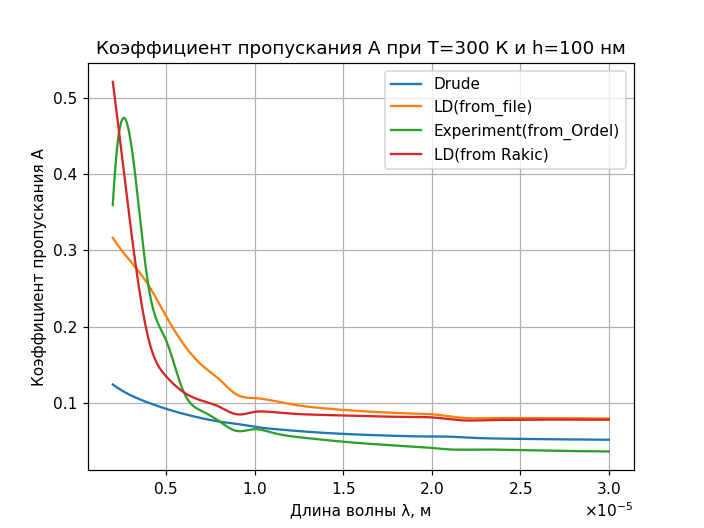

In [42]:
fig, ax = plt.subplots()

f1 = interp1d(ti_thin.wl, ti_thin.A[:,0,2], kind='cubic')
ax.plot(λnew, f1(λnew), label='Drude')

f2 = interp1d(ti_thin_LD.wl, ti_thin_LD.A[:,0,2], kind='cubic')
ax.plot(λnew, f2(λnew), label='LD(from_file)')

f3 = interp1d(ti_thin_O.wl, ti_thin_O.A[:,0,2], kind='cubic')
ax.plot(λnew, f3(λnew), label='Experiment(from_Ordel)')

f4 = interp1d(ti_thin_LDNew.wl, ti_thin_LDNew.A[:,0,2], kind='cubic')
ax.plot(λnew, f4(λnew), label='LD(from Rakic)')

ax.set_xlabel('Длина волны λ, м')
ax.set_ylabel('Коэффициент пропускания A')
ax.set_title('Коэффициент пропускания A при T=300 К и h=100 нм')
ax.legend()
ax.grid()
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)

# Chromium

In [9]:
cr_blk = dm(wl=np.arange(2e-6, 31e-6, 1e-6),
            T=np.arange(300, 1100, 100),
            metal_props=Chromium_prop,
               )
cr_blk_P = dm(wl=np.arange(2e-6, 31e-6, 1e-6),
                  T=np.array([300]),
                  metal_props=Chromium_prop,
                  from_data='Data/Cr_Palik.csv'
                 )

cr_blk_LD = dm(wl=np.arange(2e-6, 31e-6, 1e-6),
                  T=np.array([300]),
                  metal_props=Chromium_prop,
                  from_data='Data/Cr_Rakic_LD.csv'
                 )
# cr_blk_O = dm(wl=np.arange(2e-6, 31e-6, 1e-6),
#                   T=np.array([300]),
#                   metal_props=Chromium_prop,
#                   from_data='Data/Ti_Ordal.csv'
#                  )
# cr_blk_MyLD = ldm(wl=np.arange(2e-6, 31e-6, 1e-6),
#                               T=np.arange(300, 1100, 100),
#                               omega_0=2 * np.pi * 1.878778621627e14,
#                               metal_props=Chromium_prop,)

cr_blk_LDNew = ldm_new(wl=np.arange(2e-6, 31e-6, 1e-6),
                       T=np.array([300]),
                       metal_props=Chromium_prop,)

In [10]:
λnew = np.linspace(cr_blk.wl[0], cr_blk.wl[-1], num=500, endpoint=True)

<IPython.core.display.Javascript object>


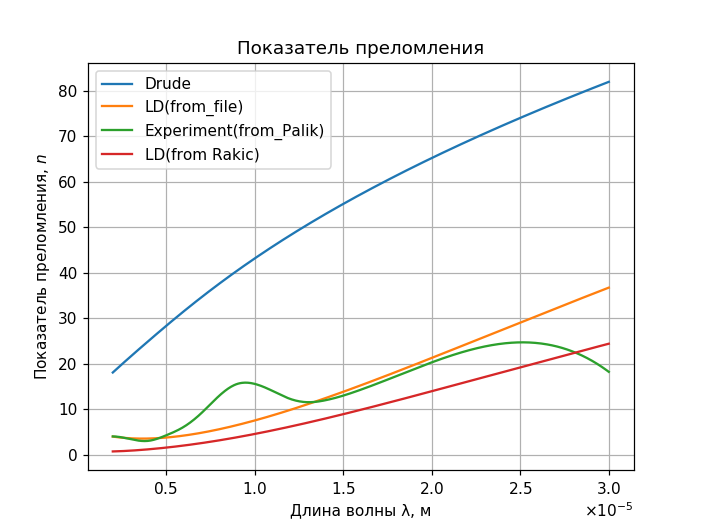

In [13]:
fig, ax = plt.subplots()

f1 = interp1d(cr_blk.wl, cr_blk.n_1[:,0], kind='cubic')
ax.plot(λnew, f1(λnew), label='Drude')

f2 = interp1d(cr_blk_LD.wl, cr_blk_LD.n_1[:,0], kind='cubic')
ax.plot(λnew, f2(λnew), label='LD(from_file)')

f3 = interp1d(cr_blk_P.wl, cr_blk_P.n_1[:,0], kind='cubic')
ax.plot(λnew, f3(λnew), label='Experiment(from_Palik)')

f4 = interp1d(cr_blk_LDNew.wl, cr_blk_LDNew.n_1[:,0], kind='cubic')
ax.plot(λnew, f4(λnew), label='LD(from Rakic)')

ax.set_xlabel('Длина волны λ, м')
ax.set_ylabel('Показатель преломления, $n$')
ax.set_title('Показатель преломления')
ax.legend()
ax.grid()
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)


<IPython.core.display.Javascript object>


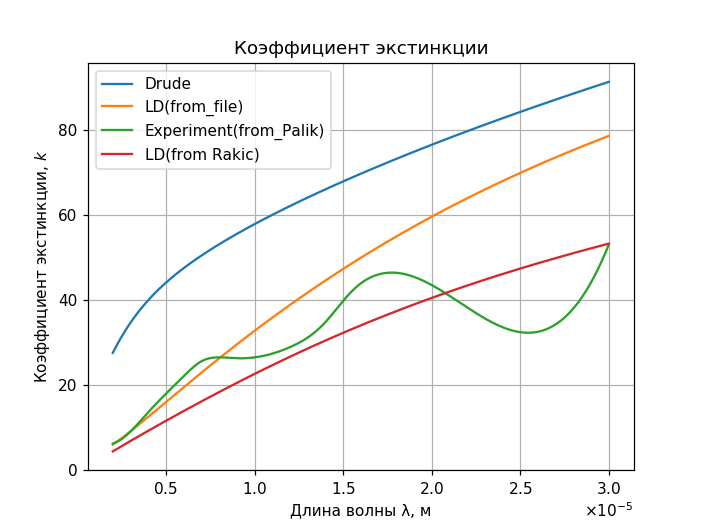

In [14]:
fig, ax = plt.subplots()

f1 = interp1d(cr_blk.wl, cr_blk.k_1[:,0], kind='cubic')
ax.plot(λnew, f1(λnew), label='Drude')

f2 = interp1d(cr_blk_LD.wl, cr_blk_LD.k_1[:,0], kind='cubic')
ax.plot(λnew, f2(λnew), label='LD(from_file)')

f3 = interp1d(cr_blk_P.wl, cr_blk_P.k_1[:,0], kind='cubic')
ax.plot(λnew, f3(λnew), label='Experiment(from_Palik)')

f4 = interp1d(cr_blk_LDNew.wl, cr_blk_LDNew.k_1[:,0], kind='cubic')
ax.plot(λnew, f4(λnew), label='LD(from Rakic)')

ax.set_xlabel('Длина волны λ, м')
ax.set_ylabel('Коэффициент экстинкции, $k$')
ax.set_title('Коэффициент экстинкции')
ax.legend()
ax.grid()
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)

<IPython.core.display.Javascript object>


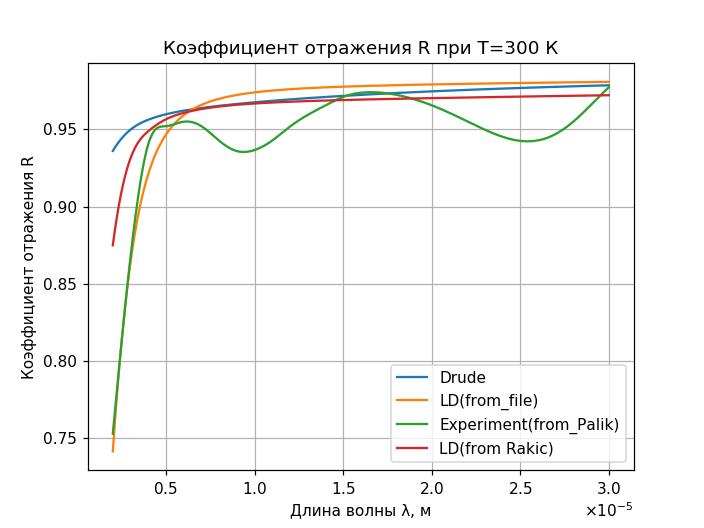

In [16]:
fig, ax = plt.subplots()

f1 = interp1d(cr_blk.wl, cr_blk.R[:,0], kind='cubic')
ax.plot(λnew, f1(λnew), label='Drude')

f2 = interp1d(cr_blk_LD.wl, cr_blk_LD.R[:,0], kind='cubic')
ax.plot(λnew, f2(λnew), label='LD(from_file)')

f3 = interp1d(cr_blk_P.wl, cr_blk_P.R[:,0], kind='cubic')
ax.plot(λnew, f3(λnew), label='Experiment(from_Palik)')

f4 = interp1d(cr_blk_LDNew.wl, cr_blk_LDNew.R[:,0], kind='cubic')
ax.plot(λnew, f4(λnew), label='LD(from Rakic)')

ax.set_xlabel('Длина волны λ, м')
ax.set_ylabel('Коэффициент отражения R')
ax.set_title('Коэффициент отражения R при T=300 К')
ax.legend()
ax.grid()
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)

<IPython.core.display.Javascript object>


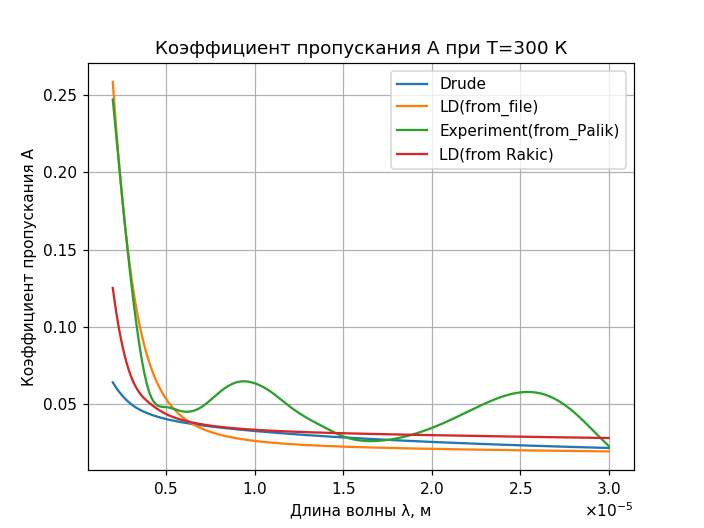

In [17]:
fig, ax = plt.subplots()

f1 = interp1d(cr_blk.wl, cr_blk.A[:,0], kind='cubic')
ax.plot(λnew, f1(λnew), label='Drude')

f2 = interp1d(cr_blk_LD.wl, cr_blk_LD.A[:,0], kind='cubic')
ax.plot(λnew, f2(λnew), label='LD(from_file)')

f3 = interp1d(cr_blk_P.wl, cr_blk_P.A[:,0], kind='cubic')
ax.plot(λnew, f3(λnew), label='Experiment(from_Palik)')

f4 = interp1d(cr_blk_LDNew.wl, cr_blk_LDNew.A[:,0], kind='cubic')
ax.plot(λnew, f4(λnew), label='LD(from Rakic)')

ax.set_xlabel('Длина волны λ, м')
ax.set_ylabel('Коэффициент пропускания A')
ax.set_title('Коэффициент пропускания A при T=300 К')
ax.legend()
ax.grid()
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)